In [17]:
import os
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

In [18]:
counts_df = pd.read_csv('gene_reads_2017-06-05_v8_skin_sun_exposed_lower_leg.csv')
counts_df = counts_df.drop(columns=['id', 'Description']).set_index('Name')
counts_df = counts_df.T
counts_df

Name,ENSG00000223972.5,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.5,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.6,ENSG00000233750.3,...,ENSG00000198886.2,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000198786.2,ENSG00000198695.2,ENSG00000210194.1,ENSG00000198727.2,ENSG00000210195.2,ENSG00000210196.2
GTEX-111FC-0126-SM-5N9DL,0,252,0,0,0,0,0,1,2,1,...,1227462,0,1,1,274832,90370,36,769375,1,5
GTEX-111VG-2426-SM-5GZXD,0,90,0,0,1,1,0,0,1,6,...,760801,2,1,0,362764,159658,59,386846,0,3
GTEX-1122O-2126-SM-5EGIR,1,109,0,1,0,2,1,0,0,2,...,297730,0,0,1,82187,93295,71,236724,3,0
GTEX-1128S-2326-SM-5GZZY,0,226,0,0,0,0,1,3,4,9,...,1403449,0,0,0,714460,333079,135,778391,4,3
GTEX-113IC-0126-SM-5HL6T,0,169,0,0,0,1,1,0,0,2,...,666278,0,0,1,365130,170416,97,368904,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZYT6-0226-SM-5NQ6T,0,125,0,0,0,1,1,0,0,0,...,678384,1,0,0,218579,74576,11,442641,0,0
GTEX-ZYW4-0126-SM-5E44A,0,59,0,1,0,1,0,1,0,2,...,719897,3,0,2,286931,123906,49,336253,3,3
GTEX-ZYY3-0126-SM-5GZY5,0,368,0,0,1,1,1,0,2,2,...,492174,1,2,1,218310,117402,71,301927,5,3
GTEX-ZZ64-1726-SM-5GZYB,0,251,0,0,0,0,1,0,0,6,...,794377,0,0,1,307862,123146,64,481667,0,3


In [19]:
counts_df['SUBJID'] = counts_df.index.str.split('-').str[0]+'-'+counts_df.index.str.split('-').str[1]
counts_df = counts_df.set_index('SUBJID')
counts_df

Name,ENSG00000223972.5,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.5,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.6,ENSG00000233750.3,...,ENSG00000198886.2,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000198786.2,ENSG00000198695.2,ENSG00000210194.1,ENSG00000198727.2,ENSG00000210195.2,ENSG00000210196.2
SUBJID,,,,,,,,,,,,,,,,,,,,,
GTEX-111FC,0,252,0,0,0,0,0,1,2,1,...,1227462,0,1,1,274832,90370,36,769375,1,5
GTEX-111VG,0,90,0,0,1,1,0,0,1,6,...,760801,2,1,0,362764,159658,59,386846,0,3
GTEX-1122O,1,109,0,1,0,2,1,0,0,2,...,297730,0,0,1,82187,93295,71,236724,3,0
GTEX-1128S,0,226,0,0,0,0,1,3,4,9,...,1403449,0,0,0,714460,333079,135,778391,4,3
GTEX-113IC,0,169,0,0,0,1,1,0,0,2,...,666278,0,0,1,365130,170416,97,368904,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZYT6,0,125,0,0,0,1,1,0,0,0,...,678384,1,0,0,218579,74576,11,442641,0,0
GTEX-ZYW4,0,59,0,1,0,1,0,1,0,2,...,719897,3,0,2,286931,123906,49,336253,3,3
GTEX-ZYY3,0,368,0,0,1,1,1,0,2,2,...,492174,1,2,1,218310,117402,71,301927,5,3


In [20]:
metadata = pd.read_csv('GTEx_Analysis_v8_Annotations_SubjectPhenotypesDS.txt', sep='\t').set_index('SUBJID')
metadata

,SEX,AGE,DTHHRDY
SUBJID,,,
GTEX-1117F,2,60-69,4.0
GTEX-111CU,1,50-59,0.0
GTEX-111FC,1,60-69,1.0
GTEX-111VG,1,60-69,3.0
GTEX-111YS,1,60-69,0.0
...,...,...,...
GTEX-ZYY3,2,60-69,4.0
GTEX-ZZ64,1,20-29,0.0
GTEX-ZZPT,1,50-59,4.0


In [21]:
metadata = metadata.loc[metadata.index.intersection(counts_df.index)]
metadata

,SEX,AGE,DTHHRDY
SUBJID,,,
GTEX-111FC,1,60-69,1.0
GTEX-111VG,1,60-69,3.0
GTEX-1122O,2,60-69,0.0
GTEX-1128S,2,60-69,2.0
GTEX-113IC,1,60-69,NaN
...,...,...,...
GTEX-ZYT6,1,30-39,1.0
GTEX-ZYW4,1,60-69,3.0
GTEX-ZYY3,2,60-69,4.0


In [22]:
samples_to_keep = ~metadata.AGE.isna()
counts_df = counts_df.loc[samples_to_keep]
metadata = metadata.loc[samples_to_keep]

In [23]:
genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
counts_df = counts_df[genes_to_keep]
counts_df.shape

(701, 49202)

In [24]:
age_groups = metadata['AGE'].unique().tolist()
age_groups_sorted = sorted(age_groups, key=lambda x: (int(x.split('-')[0]), int(x.split('-')[1])))
age_groups_sorted

['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

In [25]:
significant_genes = []
upregulated_genes = {}
downregulated_genes = {}

for age_group in age_groups_sorted[:]:
    if metadata["AGE"].nunique() <= 1:
        break
    
    inference = DefaultInference(n_cpus=8)
    dds = DeseqDataSet(
        counts=counts_df,
        metadata=metadata,
        design_factors="AGE",
        refit_cooks=True,
        ref_level=["AGE", age_group],
        inference=inference,
        n_cpus=8,
        quiet=True
    )
    dds.deseq2()
    
    for comparison_age_group in age_groups_sorted:
        if comparison_age_group == age_group:
            continue
        stat_res = DeseqStats(dds, inference=inference, contrast=["AGE", comparison_age_group, age_group])
        stat_res.summary()
        results_df = stat_res.results_df
        significant_df = results_df[results_df['padj'] < 0.05]
        significant_genes.extend(significant_df.index.tolist())
        upregulated = significant_df[significant_df['log2FoldChange'] >= 0.25].index.tolist()
        downregulated = significant_df[significant_df['log2FoldChange'] <= -0.25].index.tolist()
        comparison_name = f"{comparison_age_group} vs {age_group}"
        upregulated_genes[comparison_name] = upregulated
        downregulated_genes[comparison_name] = downregulated
    

    counts_df = counts_df[metadata["AGE"] != age_group]
    print(f"counts_df shape: {counts_df.shape}")
    metadata = metadata[metadata["AGE"] != age_group]
    print(f"metadata shape: {metadata.shape}")
    age_groups_sorted.remove(age_group)

Fitting dispersions...
... done in 1.43 seconds.

Fitting MAP dispersions...
... done in 1.51 seconds.

Fitting LFCs...
... done in 0.92 seconds.

Running Wald tests...
... done in 11.10 seconds.



Log2 fold change & Wald test p-value: AGE 30-39 vs 20-29
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.340315        0.323167  0.565388  0.571584   
ENSG00000227232.5     214.545839        0.139526  0.113122  1.233415   
ENSG00000278267.1       0.049214       -0.288043  2.167090 -0.132917   
ENSG00000243485.5       0.515143        1.033886  0.533978  1.936194   
ENSG00000237613.2       0.221260       -0.062627  0.756068 -0.082832   
...                          ...             ...       ...       ...   
ENSG00000198695.2  116068.697569        0.017794  0.142509  0.124862   
ENSG00000210194.1      66.732312        0.223484  0.189384  1.180054   
ENSG00000198727.2  504503.110650        0.047186  0.093398  0.505209   
ENSG00000210195.2       2.617516       -0.257658  0.308376 -0.835532   
ENSG00000210196.2       4.573010       -0.317350  0.277450 -1.143810   

      

Running Wald tests...
... done in 10.10 seconds.



Log2 fold change & Wald test p-value: AGE 40-49 vs 20-29
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.340315        0.240846  0.502480  0.479314   
ENSG00000227232.5     214.545839        0.036095  0.098849  0.365150   
ENSG00000278267.1       0.049214       -0.261558  1.891147 -0.138306   
ENSG00000243485.5       0.515143        1.060237  0.480695  2.205633   
ENSG00000237613.2       0.221260        0.305194  0.648957  0.470284   
...                          ...             ...       ...       ...   
ENSG00000198695.2  116068.697569       -0.112803  0.124427 -0.906579   
ENSG00000210194.1      66.732312        0.079907  0.165538  0.482708   
ENSG00000198727.2  504503.110650       -0.021020  0.081547 -0.257768   
ENSG00000210195.2       2.617516       -0.064587  0.266940 -0.241954   
ENSG00000210196.2       4.573010       -0.156740  0.240954 -0.650497   

      

Running Wald tests...
... done in 10.60 seconds.



Log2 fold change & Wald test p-value: AGE 50-59 vs 20-29
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.340315       -0.301160  0.467970 -0.643546   
ENSG00000227232.5     214.545839        0.028828  0.089458  0.322246   
ENSG00000278267.1       0.049214       -0.276318  1.709739 -0.161614   
ENSG00000243485.5       0.515143        0.411358  0.454593  0.904892   
ENSG00000237613.2       0.221260        0.099195  0.594942  0.166731   
...                          ...             ...       ...       ...   
ENSG00000198695.2  116068.697569       -0.192678  0.112606 -1.711073   
ENSG00000210194.1      66.732312       -0.167982  0.149902 -1.120616   
ENSG00000198727.2  504503.110650       -0.125707  0.073800 -1.703343   
ENSG00000210195.2       2.617516       -0.121449  0.241617 -0.502652   
ENSG00000210196.2       4.573010       -0.260536  0.218025 -1.194981   

      

Running Wald tests...
... done in 9.32 seconds.



Log2 fold change & Wald test p-value: AGE 60-69 vs 20-29
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.340315        0.024196  0.458097  0.052818   
ENSG00000227232.5     214.545839       -0.136490  0.088903 -1.535262   
ENSG00000278267.1       0.049214       -0.341464  1.698847 -0.200997   
ENSG00000243485.5       0.515143        0.612624  0.448953  1.364563   
ENSG00000237613.2       0.221260       -0.027899  0.593017 -0.047047   
...                          ...             ...       ...       ...   
ENSG00000198695.2  116068.697569       -0.222037  0.111880 -1.984590   
ENSG00000210194.1      66.732312       -0.210010  0.148933 -1.410096   
ENSG00000198727.2  504503.110650       -0.215085  0.073324 -2.933332   
ENSG00000210195.2       2.617516       -0.063645  0.239591 -0.265641   
ENSG00000210196.2       4.573010       -0.316746  0.216649 -1.462024   

      

Running Wald tests...
... done in 7.68 seconds.



Log2 fold change & Wald test p-value: AGE 70-79 vs 20-29
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.340315       -0.717406  0.776068 -0.924412   
ENSG00000227232.5     214.545839       -0.018672  0.139712 -0.133646   
ENSG00000278267.1       0.049214       -0.182099  2.667435 -0.068267   
ENSG00000243485.5       0.515143       -0.254065  0.725528 -0.350179   
ENSG00000237613.2       0.221260        0.162374  0.897200  0.180979   
...                          ...             ...       ...       ...   
ENSG00000198695.2  116068.697569       -0.498656  0.176089 -2.831840   
ENSG00000210194.1      66.732312       -0.154659  0.234182 -0.660423   
ENSG00000198727.2  504503.110650       -0.394984  0.115406 -3.422569   
ENSG00000210195.2       2.617516       -0.492775  0.384084 -1.282988   
ENSG00000210196.2       4.573010       -0.999980  0.353958 -2.825140   

      

Fitting dispersions...
... done in 1.67 seconds.

Fitting MAP dispersions...
... done in 1.69 seconds.

Fitting LFCs...
... done in 1.22 seconds.

Running Wald tests...
... done in 6.73 seconds.



Log2 fold change & Wald test p-value: AGE 40-49 vs 30-39
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.338536       -0.082146  0.485759 -0.169108   
ENSG00000227232.5     215.473019       -0.103629  0.100145 -1.034794   
ENSG00000278267.1       0.043920        0.026396  2.076173  0.012714   
ENSG00000243485.5       0.537798        0.024759  0.417961  0.059237   
ENSG00000237613.2       0.223421        0.367644  0.654950  0.561330   
...                          ...             ...       ...       ...   
ENSG00000198695.2  115397.712575       -0.130690  0.126794 -1.030730   
ENSG00000210194.1      66.701006       -0.143220  0.169602 -0.844449   
ENSG00000198727.2  503145.515928       -0.068324  0.081925 -0.833980   
ENSG00000210195.2       2.606743        0.192925  0.272216  0.708718   
ENSG00000210196.2       4.516562        0.160297  0.241259  0.664420   

      

Running Wald tests...
... done in 6.71 seconds.



Log2 fold change & Wald test p-value: AGE 50-59 vs 30-39
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.338536       -0.624387  0.449600 -1.388761   
ENSG00000227232.5     215.473019       -0.111010  0.090827 -1.222216   
ENSG00000278267.1       0.043920        0.011471  1.883076  0.006091   
ENSG00000243485.5       0.537798       -0.623853  0.388374 -1.606322   
ENSG00000237613.2       0.223421        0.161491  0.601480  0.268489   
...                          ...             ...       ...       ...   
ENSG00000198695.2  115397.712575       -0.210814  0.115028 -1.832708   
ENSG00000210194.1      66.701006       -0.391561  0.153892 -2.544389   
ENSG00000198727.2  503145.515928       -0.173260  0.074323 -2.331174   
ENSG00000210195.2       2.606743        0.135894  0.247633  0.548774   
ENSG00000210196.2       4.516562        0.057538  0.219338  0.262326   

      

Running Wald tests...
... done in 6.87 seconds.



Log2 fold change & Wald test p-value: AGE 60-69 vs 30-39
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.338536       -0.299297  0.439289 -0.681322   
ENSG00000227232.5     215.473019       -0.276623  0.090277 -3.064163   
ENSG00000278267.1       0.043920       -0.053919  1.871462 -0.028811   
ENSG00000243485.5       0.537798       -0.422266  0.381795 -1.106003   
ENSG00000237613.2       0.223421        0.034173  0.599576  0.056995   
...                          ...             ...       ...       ...   
ENSG00000198695.2  115397.712575       -0.240407  0.114307 -2.103175   
ENSG00000210194.1      66.701006       -0.433787  0.152920 -2.836687   
ENSG00000198727.2  503145.515928       -0.262884  0.073857 -3.559381   
ENSG00000210195.2       2.606743        0.193306  0.245668  0.786859   
ENSG00000210196.2       4.516562       -0.000098  0.218031 -0.000448   

      

Running Wald tests...
... done in 6.49 seconds.



Log2 fold change & Wald test p-value: AGE 70-79 vs 30-39
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.338536       -1.040878  0.766553 -1.357868   
ENSG00000227232.5     215.473019       -0.158814  0.140849 -1.127553   
ENSG00000278267.1       0.043920        0.105466  2.909536  0.036248   
ENSG00000243485.5       0.537798       -1.289263  0.683283 -1.886864   
ENSG00000237613.2       0.223421        0.224412  0.901527  0.248924   
...                          ...             ...       ...       ...   
ENSG00000198695.2  115397.712575       -0.516972  0.178443 -2.897133   
ENSG00000210194.1      66.701006       -0.378469  0.238818 -1.584758   
ENSG00000198727.2  503145.515928       -0.442739  0.115296 -3.840007   
ENSG00000210195.2       2.606743       -0.235477  0.387068 -0.608362   
ENSG00000210196.2       4.516562       -0.672738  0.350557 -1.919054   

      

Fitting dispersions...
... done in 1.54 seconds.

Fitting MAP dispersions...
... done in 2.55 seconds.

Fitting LFCs...
... done in 1.88 seconds.

Running Wald tests...
... done in 9.50 seconds.



Log2 fold change & Wald test p-value: AGE 50-59 vs 40-49
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.328092       -0.542367  0.371724 -1.459059   
ENSG00000227232.5     213.165973       -0.007523  0.070880 -0.106143   
ENSG00000278267.1       0.044688       -0.015113  1.466018 -0.010309   
ENSG00000243485.5       0.523602       -0.649713  0.319515 -2.033433   
ENSG00000237613.2       0.227163       -0.206299  0.456670 -0.451747   
...                          ...             ...       ...       ...   
ENSG00000198695.2  113811.162674       -0.080313  0.091538 -0.877368   
ENSG00000210194.1      65.126343       -0.248459  0.121163 -2.050619   
ENSG00000198727.2  496954.844412       -0.105135  0.059294 -1.773119   
ENSG00000210195.2       2.633915       -0.056957  0.196232 -0.290255   
ENSG00000210196.2       4.524303       -0.103613  0.174925 -0.592326   

      

Running Wald tests...
... done in 9.05 seconds.



Log2 fold change & Wald test p-value: AGE 60-69 vs 40-49
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.328092       -0.217382  0.359068 -0.605406   
ENSG00000227232.5     213.165973       -0.173134  0.070200 -2.466303   
ENSG00000278267.1       0.044688       -0.080462  1.451654 -0.055428   
ENSG00000243485.5       0.523602       -0.449572  0.311361 -1.443895   
ENSG00000237613.2       0.227163       -0.333519  0.454219 -0.734269   
...                          ...             ...       ...       ...   
ENSG00000198695.2  113811.162674       -0.109854  0.090624 -1.212196   
ENSG00000210194.1      65.126343       -0.290637  0.119949 -2.422996   
ENSG00000198727.2  496954.844412       -0.194758  0.058702 -3.317742   
ENSG00000210195.2       2.633915        0.000386  0.193703  0.001993   
ENSG00000210196.2       4.524303       -0.160504  0.173242 -0.926473   

      

Running Wald tests...
... done in 8.71 seconds.



Log2 fold change & Wald test p-value: AGE 70-79 vs 40-49
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.328092       -0.958795  0.729443 -1.314421   
ENSG00000227232.5     213.165973       -0.055201  0.127312 -0.433587   
ENSG00000278267.1       0.044688        0.079126  2.622598  0.030171   
ENSG00000243485.5       0.523602       -1.315304  0.654085 -2.010908   
ENSG00000237613.2       0.227163       -0.142995  0.808340 -0.176899   
...                          ...             ...       ...       ...   
ENSG00000198695.2  113811.162674       -0.386357  0.164618 -2.346994   
ENSG00000210194.1      65.126343       -0.235155  0.217729 -1.080036   
ENSG00000198727.2  496954.844412       -0.374416  0.106631 -3.511318   
ENSG00000210195.2       2.633915       -0.429000  0.359068 -1.194762   
ENSG00000210196.2       4.524303       -0.843267  0.327184 -2.577351   

      

Fitting dispersions...
... done in 1.89 seconds.

Fitting MAP dispersions...
... done in 1.80 seconds.

Fitting LFCs...
... done in 1.37 seconds.

Running Wald tests...
... done in 8.82 seconds.



Log2 fold change & Wald test p-value: AGE 60-69 vs 50-59
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.306271        0.324746  0.310003  1.047556   
ENSG00000227232.5     212.153415       -0.165674  0.056259 -2.944859   
ENSG00000278267.1       0.042201       -0.065450  1.188226 -0.055082   
ENSG00000243485.5       0.479229        0.199327  0.269903  0.738514   
ENSG00000237613.2       0.215259       -0.127429  0.379861 -0.335462   
...                          ...             ...       ...       ...   
ENSG00000198695.2  112928.581048       -0.029725  0.072820 -0.408196   
ENSG00000210194.1      63.208657       -0.042509  0.095242 -0.446326   
ENSG00000198727.2  489593.717768       -0.089731  0.046809 -1.916984   
ENSG00000210195.2       2.638662        0.057161  0.155641  0.367265   
ENSG00000210196.2       4.445173       -0.058333  0.136910 -0.426071   

      

Running Wald tests...
... done in 9.02 seconds.



Log2 fold change & Wald test p-value: AGE 70-79 vs 50-59
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.306271       -0.417191  0.712284 -0.585709   
ENSG00000227232.5     212.153415       -0.048302  0.119521 -0.404134   
ENSG00000278267.1       0.042201        0.093635  2.514659  0.037236   
ENSG00000243485.5       0.479229       -0.666428  0.638772 -1.043294   
ENSG00000237613.2       0.215259        0.062255  0.778613  0.079956   
...                          ...             ...       ...       ...   
ENSG00000198695.2  112928.581048       -0.306684  0.154981 -1.978843   
ENSG00000210194.1      63.208657        0.012636  0.202295  0.062465   
ENSG00000198727.2  489593.717768       -0.269834  0.099621 -2.708606   
ENSG00000210195.2       2.638662       -0.372642  0.338890 -1.099596   
ENSG00000210196.2       4.445173       -0.740735  0.304051 -2.436218   

      

Fitting dispersions...
... done in 2.15 seconds.

Fitting MAP dispersions...
... done in 2.18 seconds.

Fitting LFCs...
... done in 1.30 seconds.

Running Wald tests...
... done in 8.30 seconds.



Log2 fold change & Wald test p-value: AGE 70-79 vs 60-69
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.358156       -0.743215  0.673002 -1.104328   
ENSG00000227232.5     204.640602        0.115915  0.110408  1.049883   
ENSG00000278267.1       0.046594        0.157736  2.371988  0.066499   
ENSG00000243485.5       0.505971       -0.869463  0.611318 -1.422277   
ENSG00000237613.2       0.210522        0.187229  0.830733  0.225378   
...                          ...             ...       ...       ...   
ENSG00000198695.2  112367.528444       -0.278083  0.152090 -1.828412   
ENSG00000210194.1      63.355985        0.053231  0.201644  0.263986   
ENSG00000198727.2  479123.248447       -0.181025  0.100247 -1.805787   
ENSG00000210195.2       2.681776       -0.430130  0.329731 -1.304487   
ENSG00000210196.2       4.375618       -0.670212  0.277240 -2.417444   

      

In [29]:
significant_genes = list(set(significant_genes))
len(significant_genes)

8513

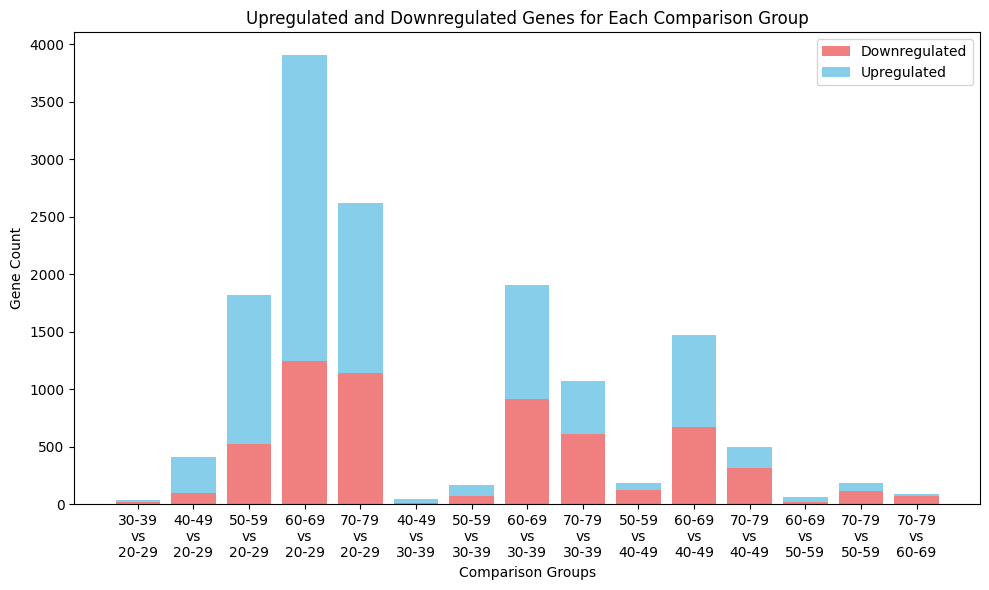

In [30]:
comparison_groups = list(upregulated_genes.keys())
upregulated_counts = [len(upregulated_genes[group]) for group in comparison_groups]
downregulated_counts = [len(downregulated_genes[group]) for group in comparison_groups]
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(comparison_groups, downregulated_counts, color='lightcoral', label='Downregulated')
bars2 = ax.bar(comparison_groups, upregulated_counts, bottom=downregulated_counts, color='skyblue', label='Upregulated')
formatted_labels = [group.replace(' vs ', '\nvs\n') for group in comparison_groups]
ax.set_xticks(comparison_groups)
ax.set_xticklabels(formatted_labels)
ax.set_ylabel('Gene Count')
ax.set_xlabel('Comparison Groups')
ax.set_title('Upregulated and Downregulated Genes for Each Comparison Group')
ax.legend()
plt.tight_layout()
plt.show()